Importing libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Dataset

In [3]:
df= pd.read_csv("scores_data.csv")

Quality Checks

In [4]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [6]:
df.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [7]:
df.isnull().sum()

Batch          0
User_ID        0
   Score       0
dtype: int64

In [12]:
df.columns


Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

Univariate Analysis

In [17]:
df['Batch '].value_counts()


Batch 
AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: count, dtype: int64

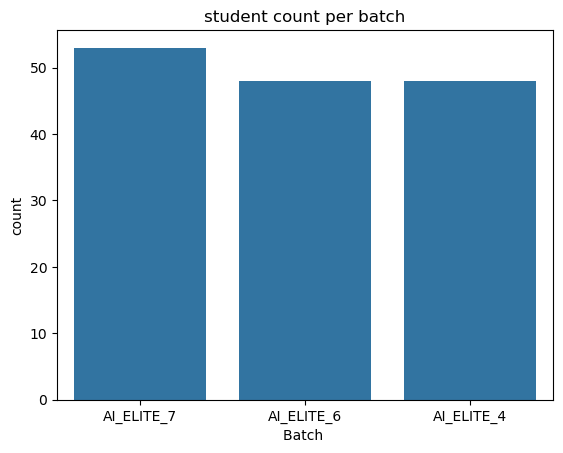

In [19]:
sns.countplot(x= "Batch ", data= df)
plt.title("student count per batch")
plt.show()

In [20]:
df['   Score   '].describe()

count       149
unique        8
top       4 / 7
freq         40
Name:    Score   , dtype: object

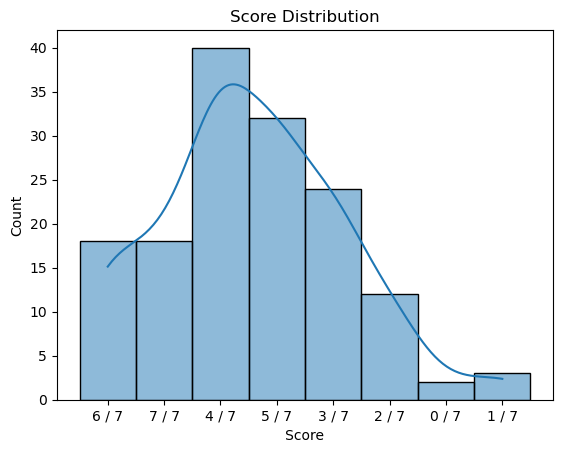

In [24]:
sns.histplot(df['   Score   '], bins= 7, kde=True)
plt.title("Score Distribution")
plt.xlabel('   Score   ')
plt.show() 
#histogram

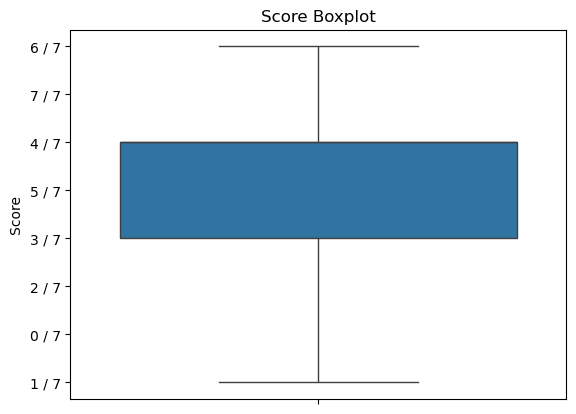

In [27]:
sns.boxplot(y= df['   Score   '])
plt.title("Score Boxplot")
plt.show()
#boxplot

Column reset

In [38]:
df.columns = df.columns.str.strip()


In [39]:
df['Score'] = df['Score'].str.split('/').str[0].str.strip().astype(int)


In [40]:
df['Score'].head()
df['Score'].dtype


dtype('int32')

Bivariate Analysis

In [42]:
df.groupby('Batch')['Score'].mean()

Batch
AI_ELITE_4    3.791667
AI_ELITE_6    4.229167
AI_ELITE_7    5.056604
Name: Score, dtype: float64

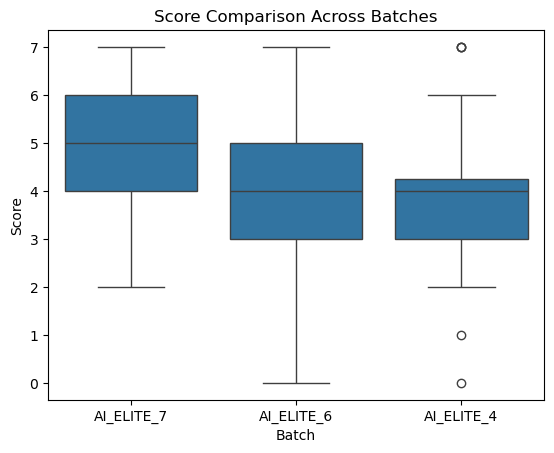

In [43]:
sns.boxplot(x='Batch', y='Score', data=df) 
plt.title("Score Comparison Across Batches") 
plt.show()


Hypothesis Testing

In [48]:
groups = [group['Score'].values for name, group in df.groupby('Batch')] 
f_stat, p_value = stats.f_oneway(*groups) 
print("p-value:", p_value)
#AVOVA hypothesis
#p > 0.05 → Fail to reject H₀ (no significant difference)
#p ≤ 0.05 → Reject H₀

p-value: 0.00017346323549509082


p-value: nan


In [54]:
summary = df.groupby('Batch').agg( mean_score=('Score', 'mean'), median_score=('Score', 'median'), student_count=('Score', 'count'), std_dev=('Score', 'std') ) 
summary

,mean_score,median_score,student_count,std_dev
Batch,,,,
AI_ELITE_4,3.791667,4.0,48,1.443376
AI_ELITE_6,4.229167,4.0,48,1.640441
AI_ELITE_7,5.056604,5.0,53,1.446682


In [ ]:
summary = df.groupby('Batch').agg( mean_score=('Score', 'mean'), median_score=('Score', 'median'), student_count=('Score', 'count'), std_dev=('Score', 'std') ) 
summary